# Introduction to RNN/LSTM

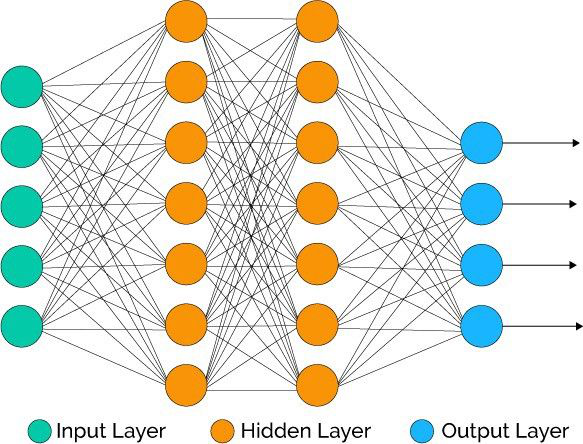

In [1]:
from PIL import Image
Image.open("nn.jpeg")

+ neurons(0 and 1)
+ layers
+ lines(weight)
+ mathematical fomulars

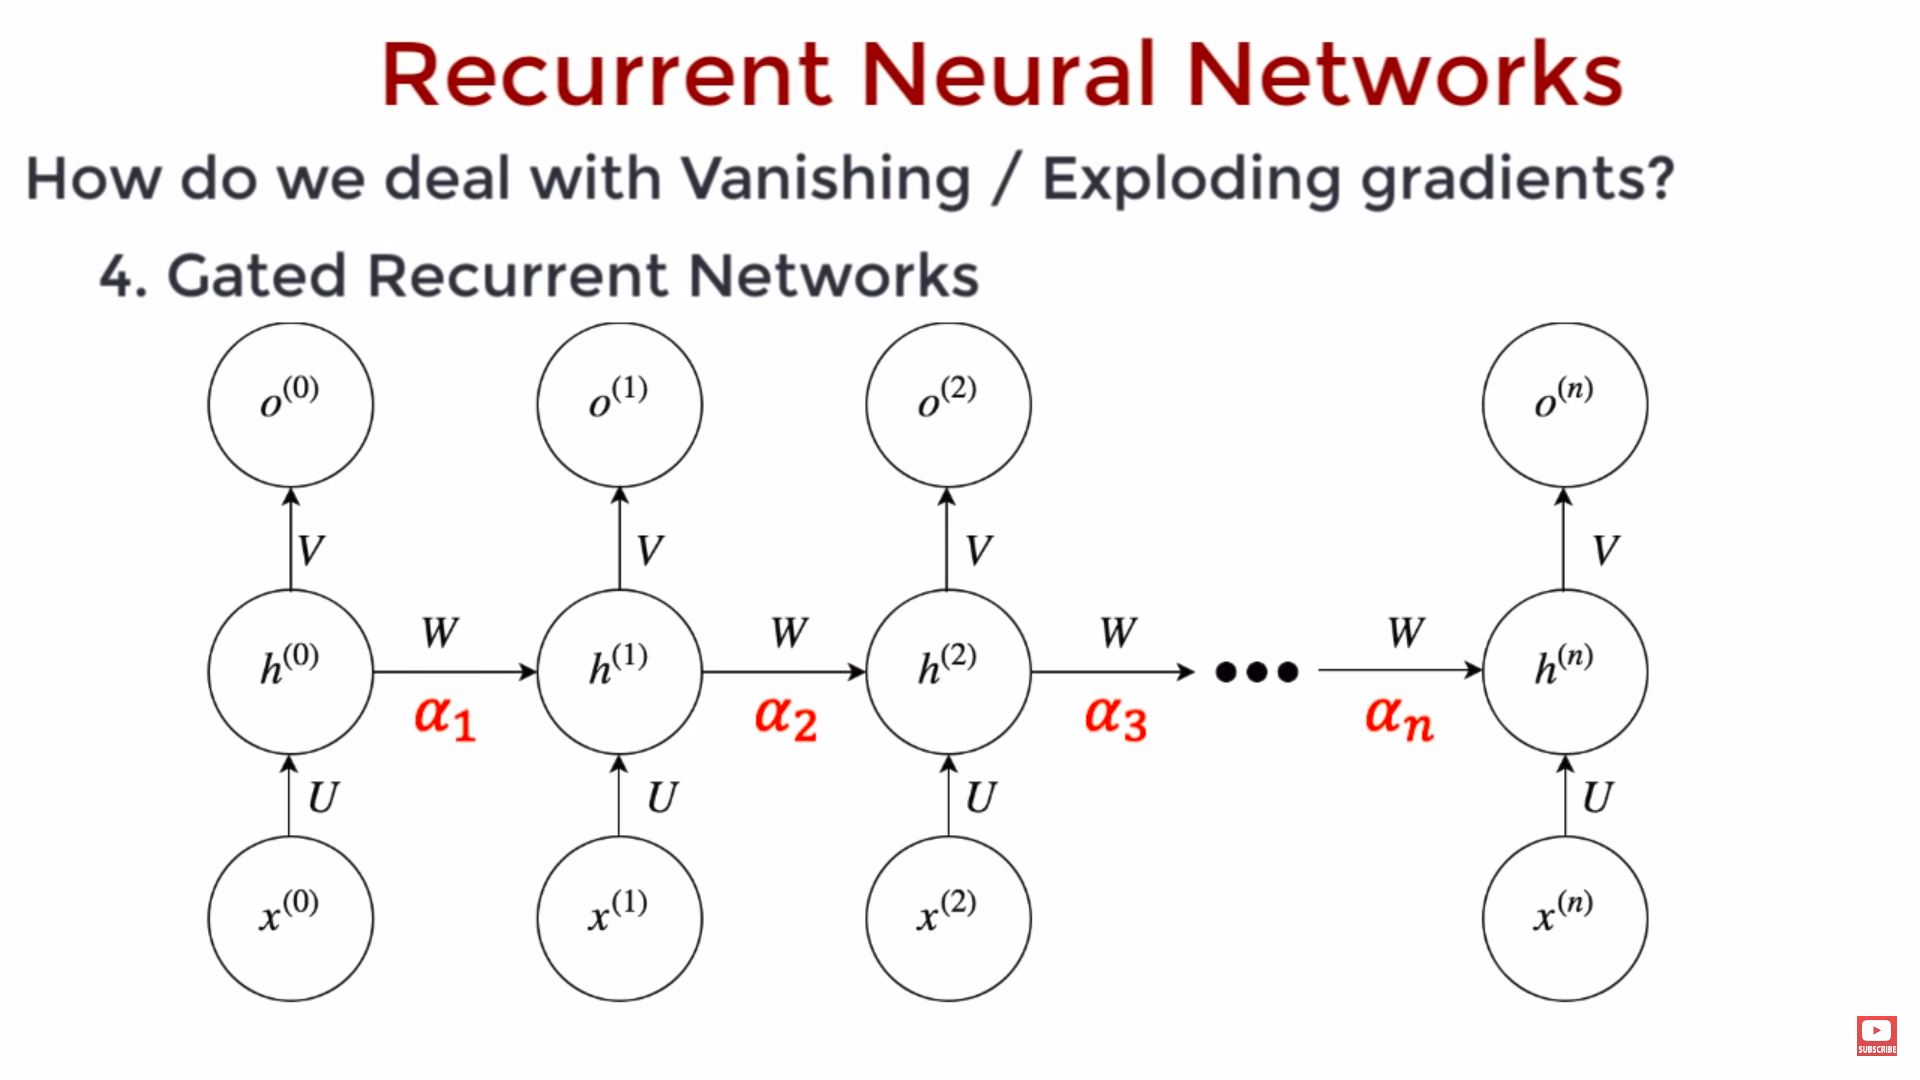

In [2]:
Image.open("rnn.png")

### sequential data (memory matters!) (when feed-forward nn don't)
- input -> hidden -> output (nn)
- (input + prev_hidden) -> hidden -> output (rnn)

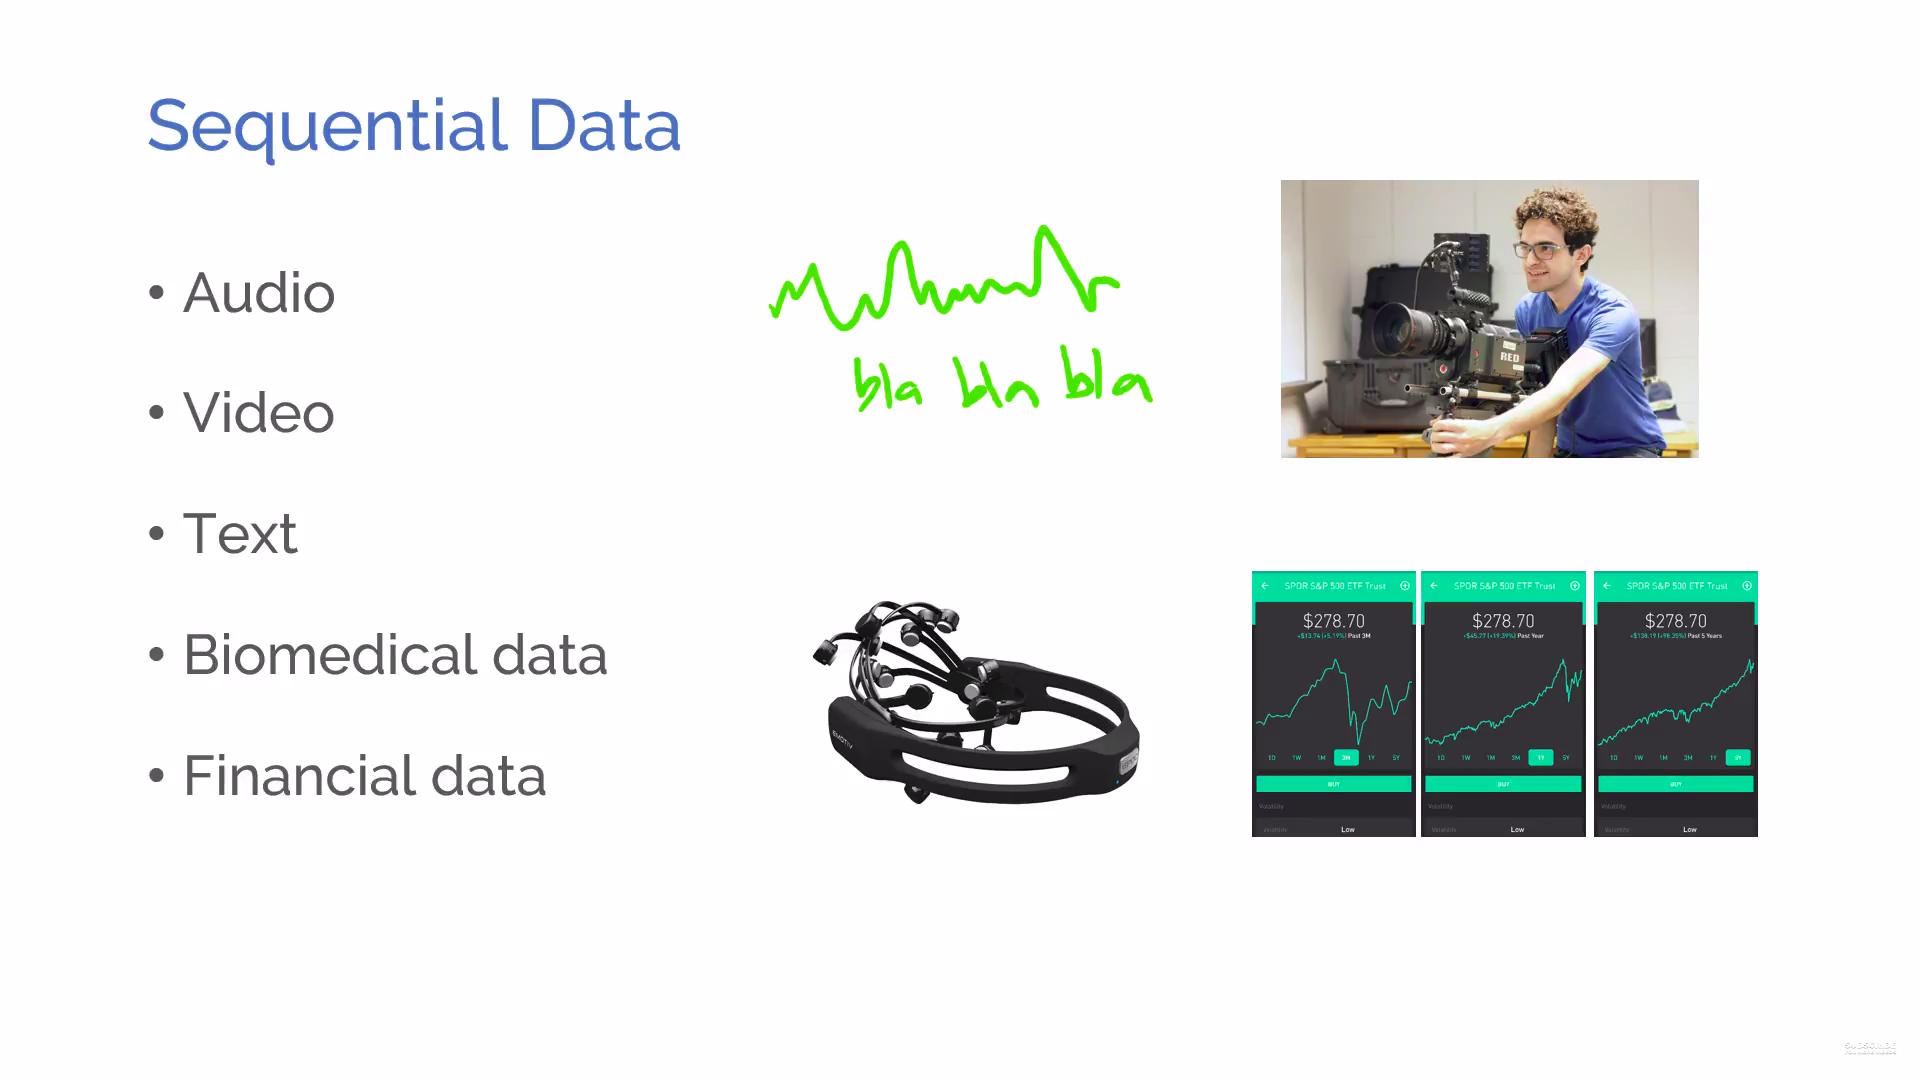

In [6]:
Image.open("sd.png")

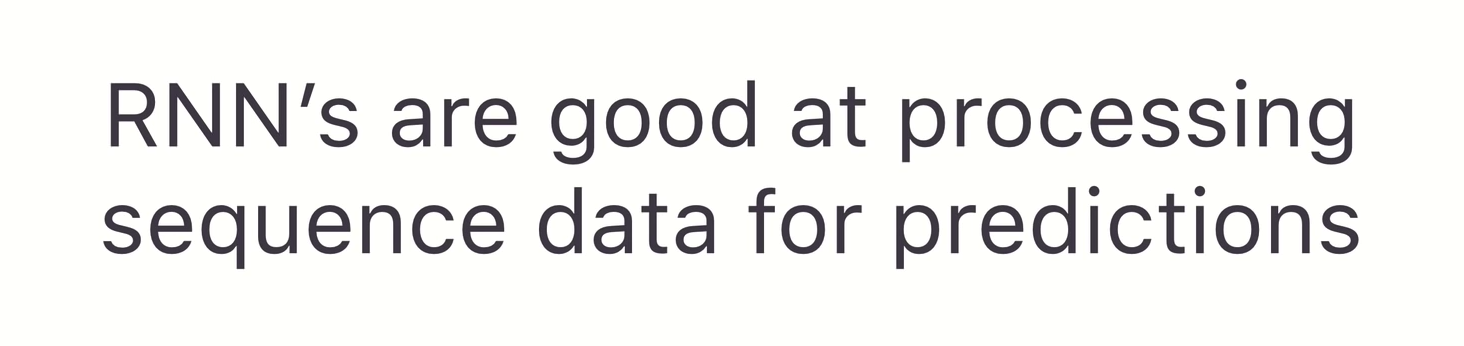

In [5]:
Image.open("sequence.png")

## The Vanishing Gradient Problem

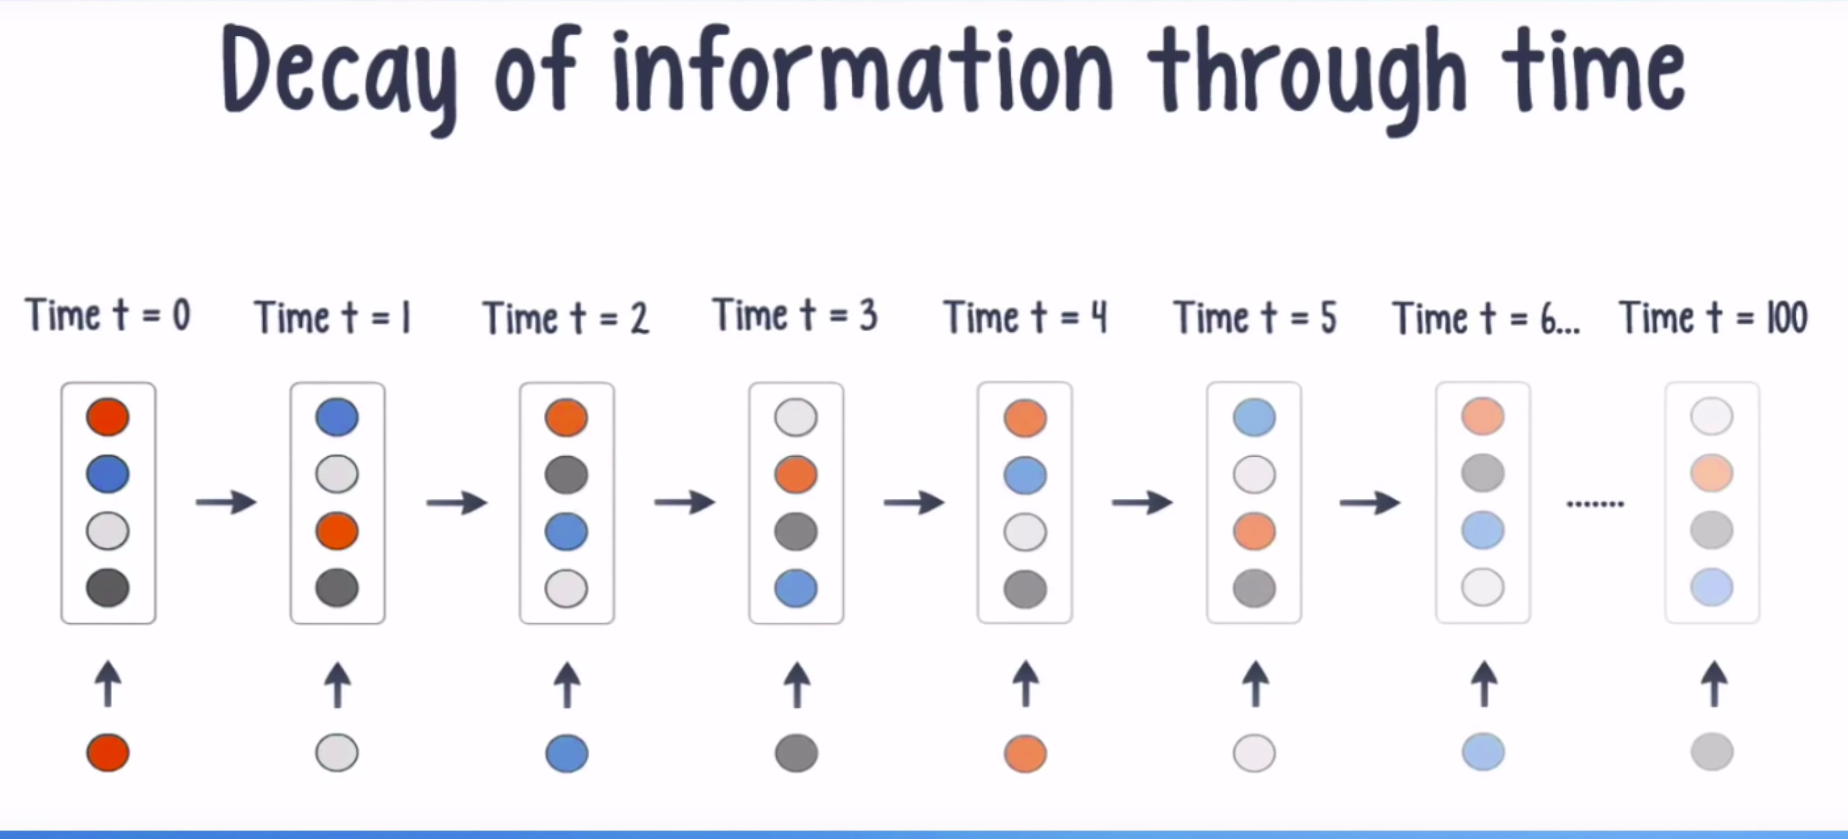

In [14]:
Image.open("decay.png")

+ past values become more subtle over time -> bad for long term learning

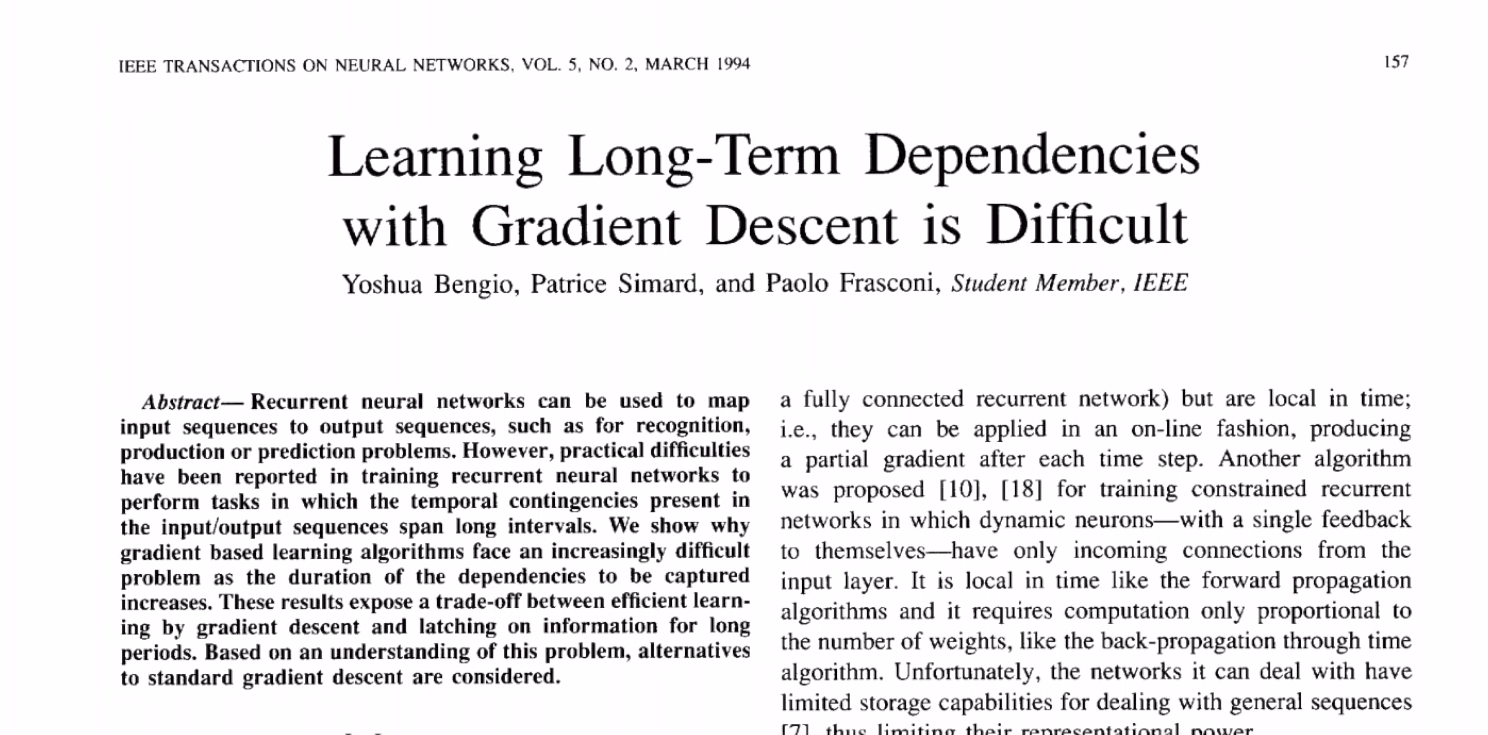

In [15]:
Image.open("longterm.png")

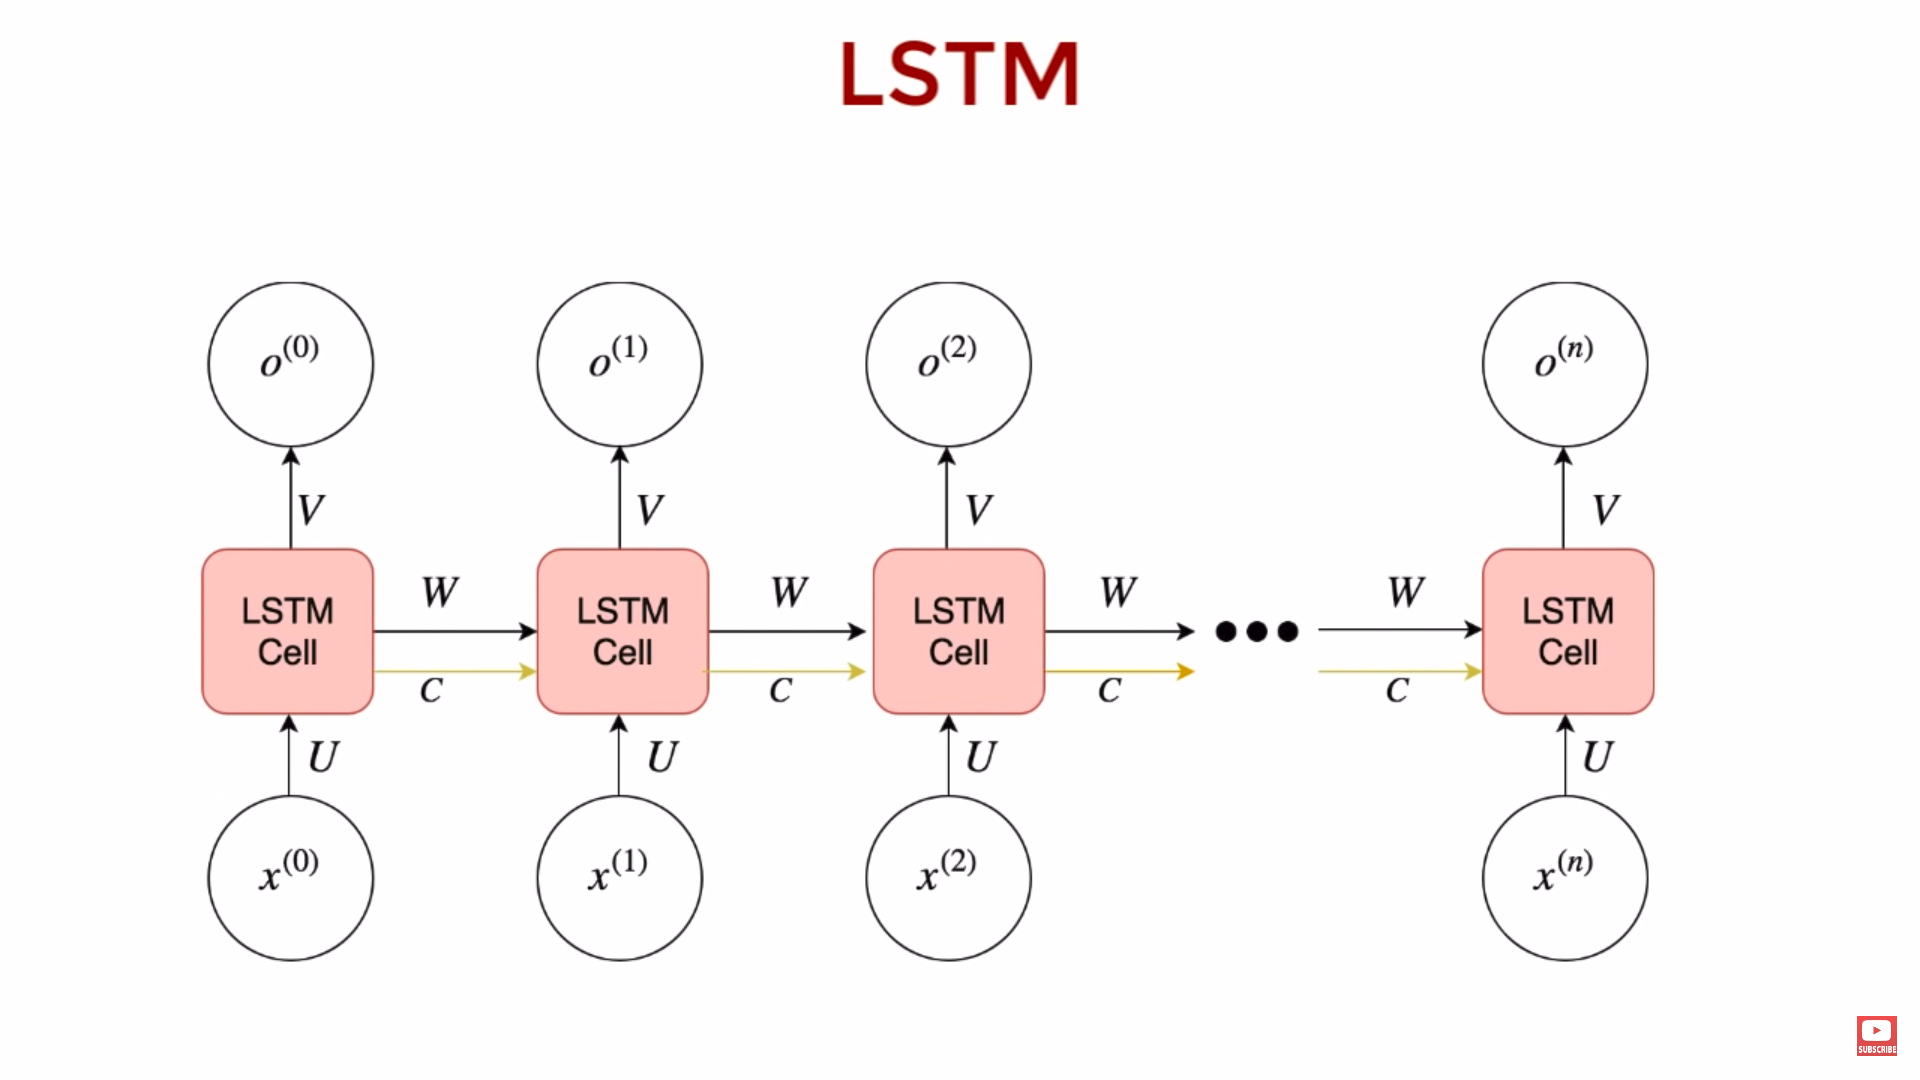

In [3]:
Image.open("lstm.png")

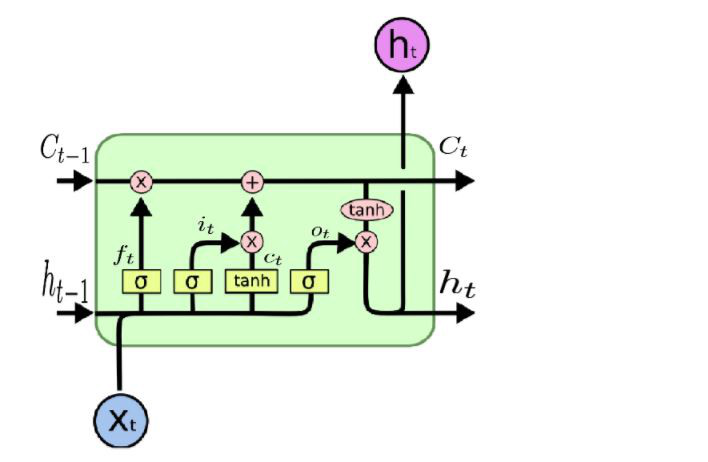

In [12]:
Image.open("lstm.jpeg")

# one LSTM cell contain 4 distinct NN cells

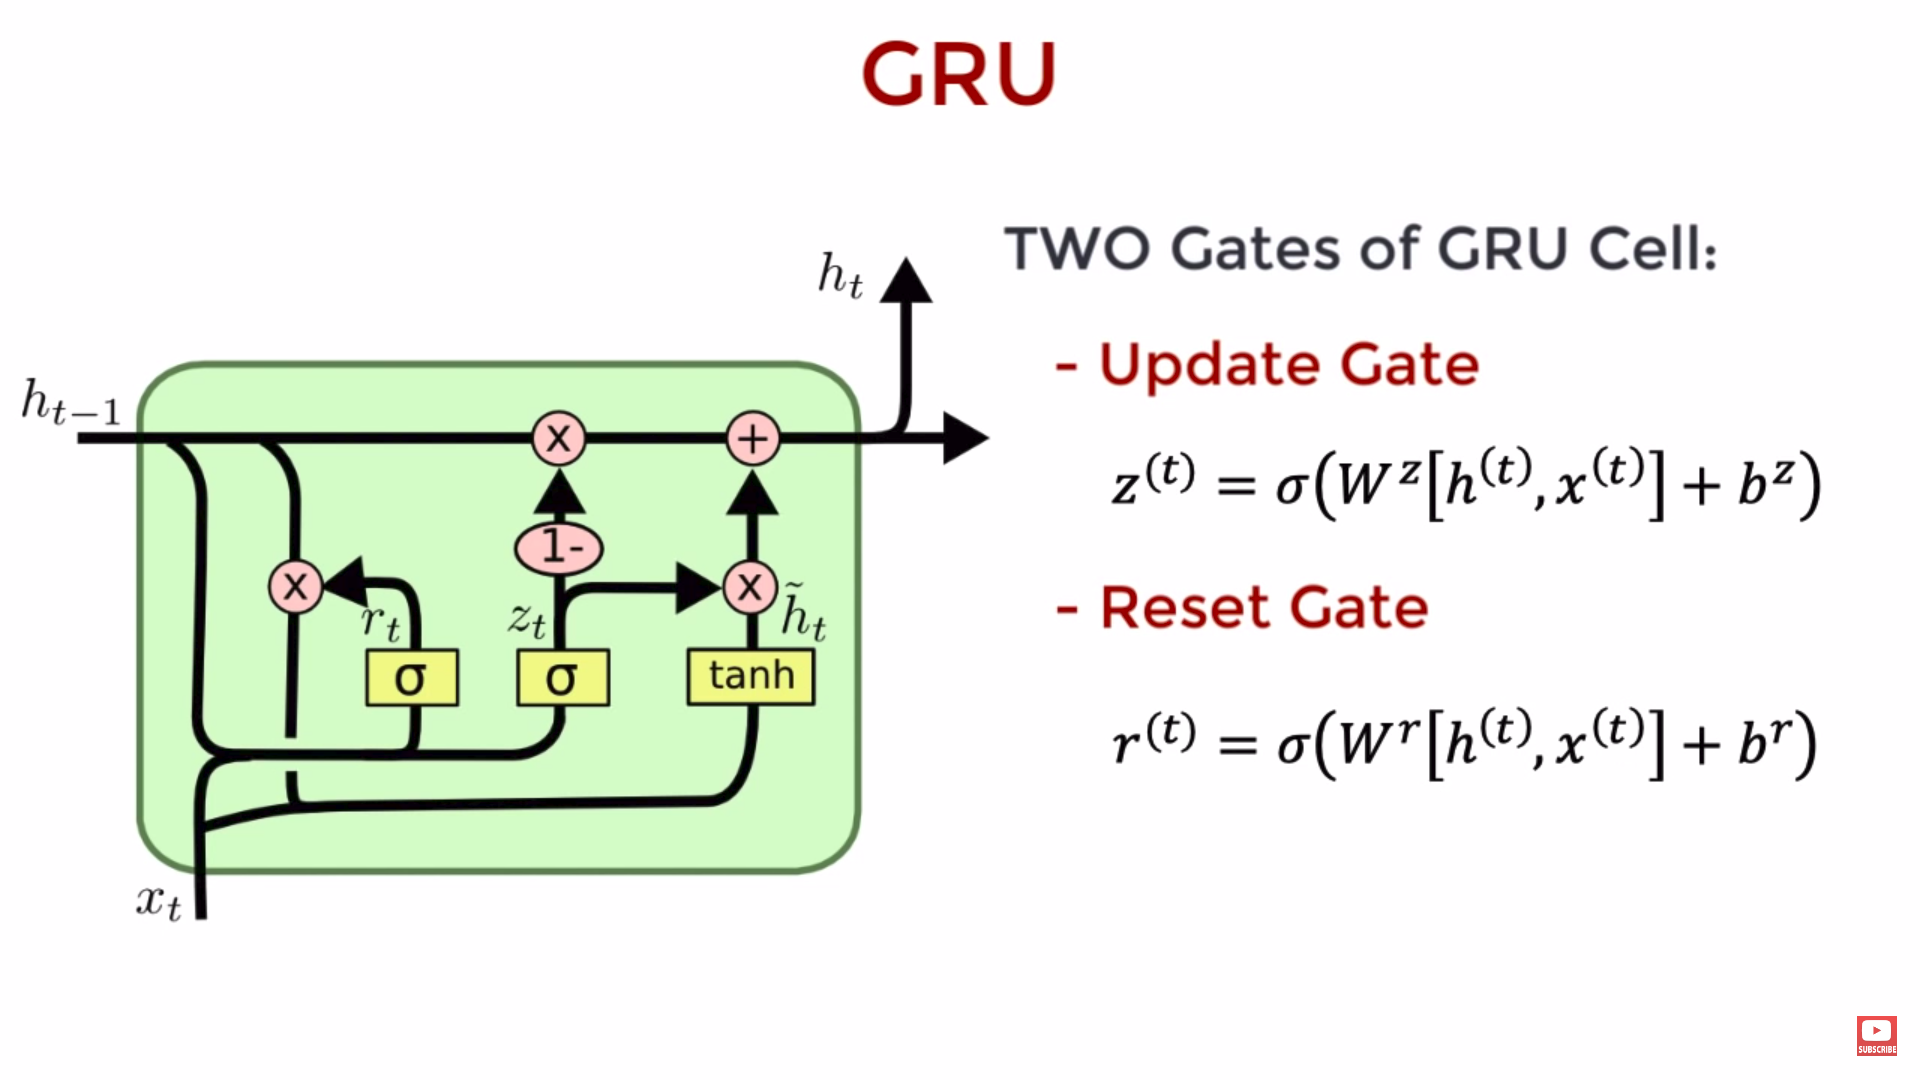

In [8]:
Image.open("gru.png")

# Advantages over tradional methods

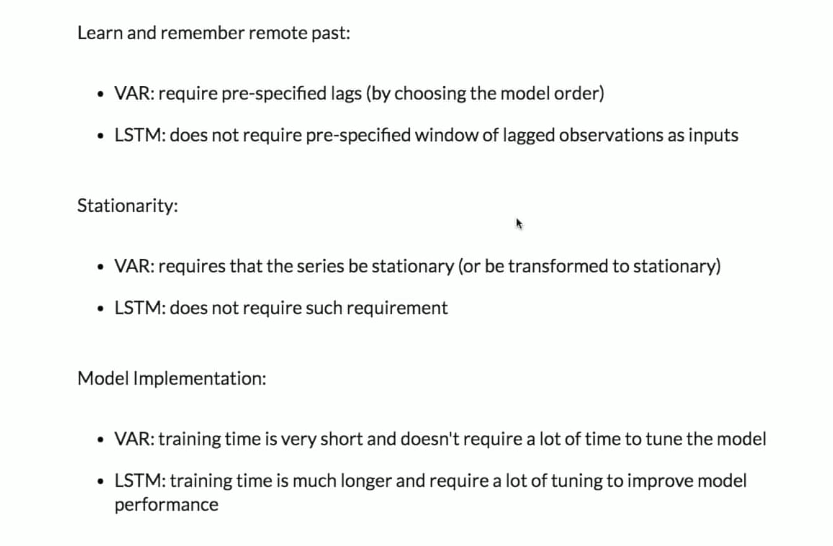

In [10]:
Image.open("compare.png")

### Suitable for non-specialist in time series
+ Does not rely on the time series characteristics: seasonality, trend, random(irregular), stationary, level
+ Scaling instead of transforming

+ Naive Approach, Simple Average -> Moving Average -> Exponential Smoothing -> Holt's Linear Method -> Holt's Winter Method

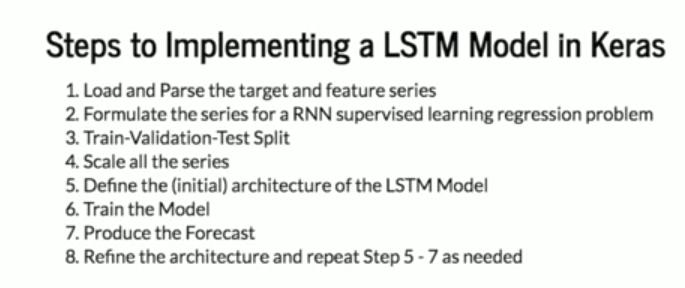

In [11]:
Image.open("steps.png")

# Implementation
+ Introduction to the data set

### 1. Data preprocessing

In [11]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the training set
dataset_train = pd.read_excel('train.xlsx')
training_set = dataset_train.iloc[:, 2:3].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 50 timesteps and 1 output
X_train = []
y_train = []
timestep = 50

for i in range(timestep, 201):
    X_train.append(training_set_scaled[i-timestep:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [12]:
X_train.shape[1]
# this is the timestep

50

### 2. Build the LSTM

In [15]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Flatten

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 512, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(Flatten())

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 300, batch_size = 32)

Epoch 1/300
151/151 [==============================] - 3s 20ms/step - loss: 0.1191
Epoch 2/300
151/151 [==============================] - 2s 11ms/step - loss: 0.0705
Epoch 3/300
151/151 [==============================] - 2s 11ms/step - loss: 0.0698
Epoch 4/300
151/151 [==============================] - 2s 11ms/step - loss: 0.0598
Epoch 5/300
151/151 [==============================] - 2s 11ms/step - loss: 0.0503
Epoch 6/300
151/151 [==============================] - 2s 12ms/step - loss: 0.0492
Epoch 7/300
151/151 [==============================] - 2s 12ms/step - loss: 0.0514
Epoch 8/300
151/151 [==============================] - 2s 12ms/step - loss: 0.0481
Epoch 9/300
151/151 [==============================] - 2s 11ms/step - loss: 0.0485
Epoch 10/300
151/151 [==============================] - 2s 13ms/step - loss: 0.0454
Epoch 11/300
151/151 [==============================] - 2s 13ms/step - loss: 0.0430
Epoch 12/300
151/151 [==============================] - 2s 12ms/step - loss: 0.0425
E

151/151 [==============================] - 2s 12ms/step - loss: 0.0196
Epoch 195/300
151/151 [==============================] - 2s 12ms/step - loss: 0.0200
Epoch 196/300
151/151 [==============================] - 2s 12ms/step - loss: 0.0181
Epoch 197/300
151/151 [==============================] - 2s 12ms/step - loss: 0.0214
Epoch 198/300
151/151 [==============================] - 2s 10ms/step - loss: 0.0205
Epoch 199/300
151/151 [==============================] - 2s 11ms/step - loss: 0.0197
Epoch 200/300
151/151 [==============================] - 2s 12ms/step - loss: 0.0199
Epoch 201/300
151/151 [==============================] - 2s 15ms/step - loss: 0.0178
Epoch 202/300
151/151 [==============================] - 3s 17ms/step - loss: 0.0186
Epoch 203/300
151/151 [==============================] - 3s 22ms/step - loss: 0.0176
Epoch 204/300
151/151 [==============================] - 2s 10ms/step - loss: 0.0183
Epoch 205/300
151/151 [==============================] - 2s 10ms/step - loss: 0

### 3. Predicting and Visualizing

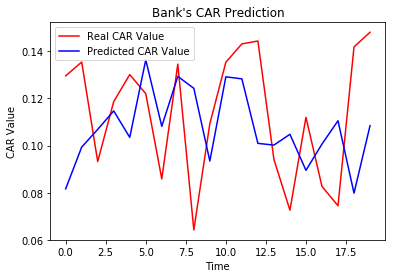

In [20]:
# Part 3 - Making the predictions and visualising the results

# Getting the real CAR values
dataset_test = pd.read_excel('test.xlsx')
real_car = dataset_test.iloc[:, 2:3].values


# Getting the predicted CAR values
dataset_total = pd.concat((dataset_train['Value'], dataset_test['Value']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - timestep:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []

for i in range(timestep, timestep+20): # 50 data values in test set
    X_test.append(inputs[i-timestep:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_car = regressor.predict(X_test)
predicted_car = sc.inverse_transform(predicted_car)

# Visualising the results
plt.plot(real_car, color = 'red', label = 'Real CAR Value')
plt.plot(predicted_car, color = 'blue', label = 'Predicted CAR Value')
plt.title("Bank's CAR Prediction")
plt.xlabel('Time')
plt.ylabel('CAR Value')
plt.legend()
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(real_car, predicted_car))
rms

0.03144844681302345

In [ ]:
# timestep = 40 -> rms = 0.024339930553817876
# timestep = 60 -> rms = 0.02874293930901703

# Summary
+ RNN is good at sequential data including time series data
+ LSTM eliminates the vanishing gradient problem, improving the performance of the model
+ Does not require tradition time series attributes
+ Easily implemented with Keras

# Suggestion
+ more epoch
+ more data
+ different structure (hidden layers, units, complexity)